<a href="https://colab.research.google.com/github/Waleed-Mujahid/Machine-Learning/blob/main/Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logsitic Regression
In this notebook I will build a simple logistic regression model using sklearn. The dataset used is **Social_Network_Ads**. 

## Importing Dependencies
Firstly we import our dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## Pandas DataFrame
Next we load our dataset into a Pandas dataframe

In [2]:
#load Data_set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")

We can make use of df.head() and df.info() to look at our data.

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


So we have 400 examples. We have do not have any missing or invalid data. So we do not need to do any data manipulation.

Now we extract valuable infomation from the Pandas DataFrame

In [5]:
X = df.drop(['User ID','Purchased'], axis = 1)
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [6]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Visualizing our Data
Now we make use of Seaborn library to Visualize our Data. First we update the size of our plot parameters


In [7]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

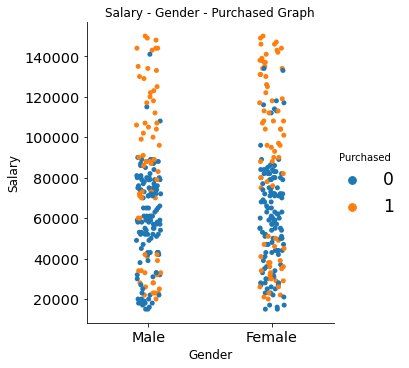

In [8]:
import seaborn as sns
sns.catplot(y='EstimatedSalary', x = 'Gender' , data = df, hue = 'Purchased')
plt.title("Salary - Gender - Purchased Graph")
plt.ylabel("Salary")
plt.show()

As **Gender** is a categorical attribute, we convert it into Numerical form as follows:

In [9]:
X=pd.get_dummies(columns=['Gender'],data=X,drop_first=True)

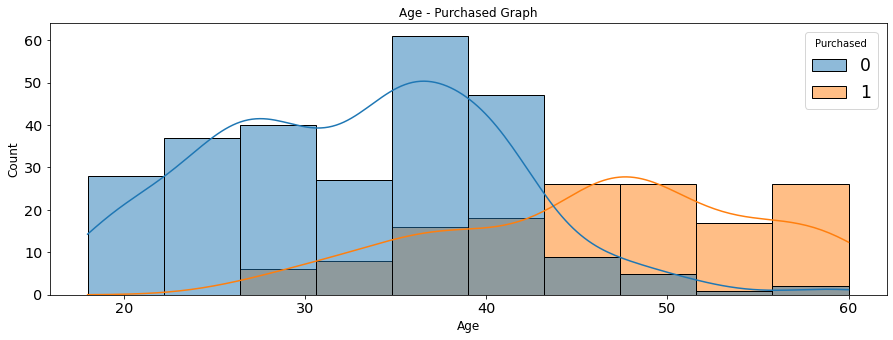

In [10]:
sns.histplot(x='Age', data  = df, hue = 'Purchased', kde =True)
plt.title("Age - Purchased Graph")
plt.show()

From the graph it is visible that, elder people generally make purchases and younger people do not.

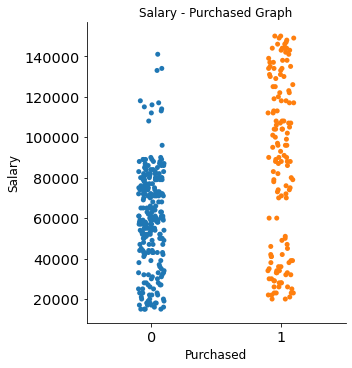

In [11]:
sns.catplot(y='EstimatedSalary', x = 'Purchased' , data = df)
plt.ylabel("Salary")
plt.title("Salary - Purchased Graph")
plt.show()

From this graph we can see that, lower salaried induviduals generally do not buy Ads.

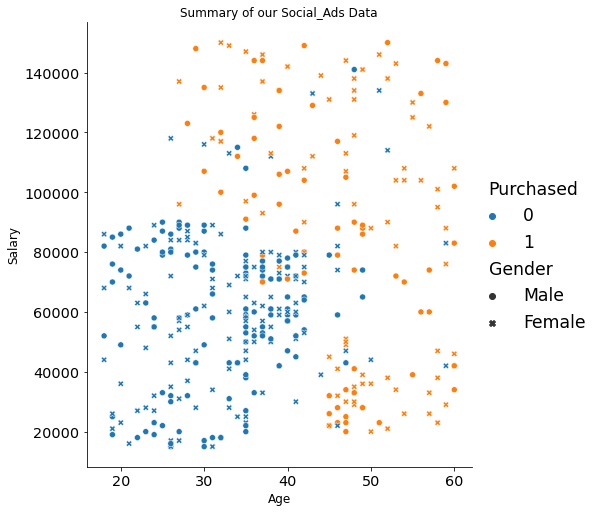

In [12]:
sns.relplot(x="Age", y = "EstimatedSalary", hue = 'Purchased', data = df, style = 'Gender', height = 7)
plt.title("Summary of our Social_Ads Data")
plt.ylabel("Salary")
plt.show()

Here we need to make a decision boundary that will be able to separate, the people that purchased ads from the ones that did not.

## Building our Model
We use Sklearn to split our data into Training and Test sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

### Creating a Pipeling
  We create a pipeline of our model.
1. Firstly we need to normalize our data. If the values of features are between 0 and 1 they become easy for the model to learn. So we preprocess our data.
2. Secondly we need to select a model to fit our data.

We fit both of these tasks in a pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

classifier = Pipeline([
            ('scale', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('model', LogisticRegression())
])

### Fitting our Pipeline

In [15]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression())])

### Predicting on the Test Set

In [16]:
#Predicting new results
y_pred = classifier.predict(X_test)

## Checking our Model's Accuracy
We use accuracy_score from Sklearn to get out model's accuracy

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [18]:
print(f'So the Accuracy of our model is: {accuracy*100} % .')

So the Accuracy of our model is: 93.75 % .


## Visualizing our Model's Results
  We use a Confusion Matrix to show the performace of our model.

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, normalize='true')

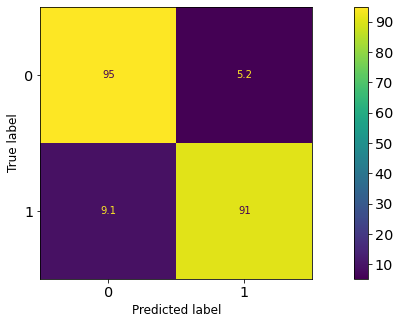

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm*100)
disp.plot()  